In [1]:
!pip install sklearn

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data viz

# MODEL STUFF
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

data/credit_score_submision_2.csv
data/sampleEntry.csv
data/credit_score_submision.csv
data/cs-test.csv
data/Data Dictionary.xls
data/cs-training.csv


<div class="alert alert-block alert-warning">

# Context 

This competition requires participants to improve on the state of the art in credit scoring, by predicting the probability that somebody will experience financial distress in the next two years. While the question mentions probability, the target variable is framed as a binary 0 or 1, making it a binary classification task.

# Questions to answer:

- **Q1:**  What is your preliminary analysis of the given dataset?
    
    - <span style="color:green">**Ans:** Refer to [this section on Data Exploration](#Explore-Our-Data) </span>
    
- **Q2:**  Tell us how you validate your model, which, and why you chose such evaluation technique(s).
    
    - <span style="color:green">**Ans:** Refer to [this section on Modelling](#Modelling)</span>
</br>

- **Q3:**  What is AUC? Why do you think AUC was used as the evaluation metric for such a problem? What are other metrics that you think would also be suitable for this competition?**

    - <span style="color:green">**Ans:** Refer to [this section on Modelling](#Modelling)</span>

- **Q4:**  What insight(s) do you have from your model?**

    - <span style="color:green">**Ans:** Refer to [this section on Modelling Results](#Summary-of-results)</span>

- **Q5:**  Can you get into the top 100 of the private leaderboard, or even higher?
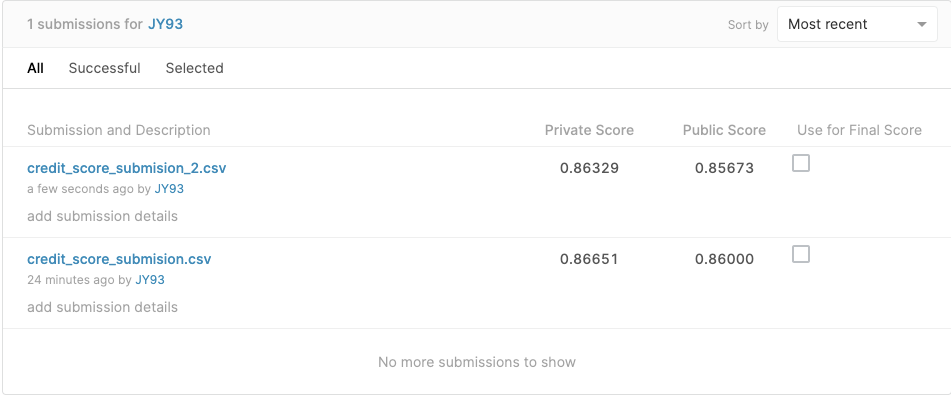

    - <span style="color:green">**Ans:** Unfortunately no, I could only get into the top 150 with my submissions. With more pre-processing of the data, I think it is definitely possible. I tried to hack it by fine-tuning the model, but as in any Data Science problem, the Data is the main bulk of the problem!


## Explore Our Data

Let us check out our data and see what insights we can glean from them!

In [3]:
# Constants
extra_index_col = 'Unnamed: 0'

In [4]:
data_dict = pd.read_excel("data/Data Dictionary.xls")
data_dict = data_dict.set_index(extra_index_col).T.to_dict('list')

In [5]:
df_train = pd.read_csv("data/cs-training.csv").drop([extra_index_col],axis=1)
df_test = pd.read_csv("data/cs-test.csv").drop([extra_index_col],axis=1)

df_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      0 non-null       float64
 1   RevolvingUtilizationOfUnsecuredLines  101503 non-null  float64
 2   age                                   101503 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  101503 non-null  int64  
 4   DebtRatio                             101503 non-null  float64
 5   MonthlyIncome                         81400 non-null   float64
 6   NumberOfOpenCreditLinesAndLoans       101503 non-null  int64  
 7   NumberOfTimes90DaysLate               101503 non-null  int64  
 8   NumberRealEstateLoansOrLines          101503 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  101503 non-null  int64  
 10  NumberOfDependents                    98877 non-null   float64
dtype

### Target Var

Looks like an imbalanced binary class problem - got to deal with it later downstream. This is also obtained over 2 years, so the likelihood of delinquency might be much higher in bust years - so the problem is one that is at risk of concept drift (target distribution changes)

In [8]:
# Definition of target var
data_dict.get("SeriousDlqin2yrs")

['Person experienced 90 days past due delinquency or worse ', 'Y/N']

In [9]:
df_train.SeriousDlqin2yrs.value_counts()

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

### Feature 1: RevolvingUtilizationOfUnsecuredLines

**Hypothesis:** It is expected that as this value increases (debt > credit), the proportion of people defaulting should increase as well. 

**Possible Actions:** We can bin this value to a threshold to encode some domain knowledge if we have e.g. after a certain threshold, it will be considered high risk for instance. The reason to do this is to minimise computations in float which take much longer than those in int, as well as to clip the outliers to a certain category in case they skew the loss calculations.

**TODO:** Need to delve deeper into the domain to understand how to interpret this feature and its data

**Actionable:** Will scale these continuous values later on


In [10]:
# Definition of var
data_dict.get("RevolvingUtilizationOfUnsecuredLines")

['Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits',
 'percentage']

In [11]:
# Highly right skewed - mean to the left of chart
df_train.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [12]:
df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["RevolvingUtilizationOfUnsecuredLines"].describe()

count    139974.000000
mean          6.168855
std         256.126350
min           0.000000
25%           0.026983
50%           0.133288
75%           0.487686
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [13]:
df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["RevolvingUtilizationOfUnsecuredLines"].describe()

count    10026.000000
mean         4.367282
std        131.835778
min          0.000000
25%          0.398219
50%          0.838853
75%          1.000000
max       8328.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

### Feature 2: age

**Hypothesis:** It is expected that as this value increases, the proportion of people defaulting should increase as well. 

**Insights:** People in the mid-life (50-60) borrow most. There appears to be spikes in certain age ranges that coincide with delinquency probably due to life phases based on the charts below. 

**Possible Actions:** Therefore, we can bin this value to encode some domain knowledge if we have e.g. age range of fresh grad, newly married, with kids, retirement etc. Otherwise, we can let the model learn by itself. 

**Actionable:** Will scale these continuous values later on


In [14]:
data_dict.get("age")

['Age of borrower in years', 'integer']

In [15]:
df_train["age"].describe()

count    150000.000000
mean         52.295207
std          14.771866
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

/Users/junyean/miniconda3/envs/fp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

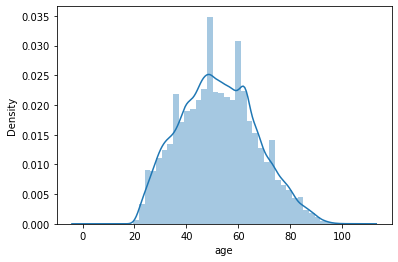

In [16]:
sns.distplot(df_train["age"])


/Users/junyean/miniconda3/envs/fp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

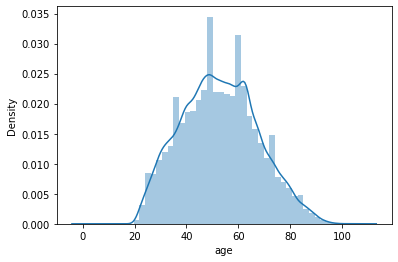

In [17]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 0]["age"])


/Users/junyean/miniconda3/envs/fp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

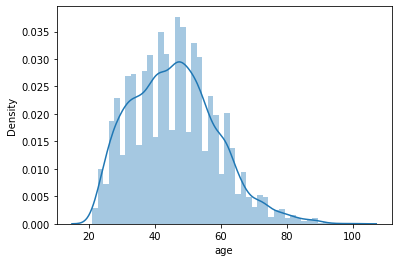

In [18]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["age"])


### Feature 3: NumberOfTime30-59DaysPastDueNotWorse
### Feature 4: NumberOfTime60-89DaysPastDueNotWorse
### Feature 5: NumberOfTimes90DaysLate

**Hypothesis:** For all these values, they differ in the severity of late payments (late but paid up, very late but paid up, extremely late), but should have the same trend line. It is expected that as this value increases, the proportion of people defaulting should increase as well because they have a poor track record.

**Insights:** Again a right skew (power law), which is not out of the ordinary as most people pay up on time else they risk interest rate payments. Hard to differentiate the delinquents just based on this feature alone. Some possible "wrong values" (too uncanny to be true)

**Possible Actions:** This is a value that makes sense to be grouped together i.e if he habitually pays late (ignoring the severity), he might one day not be able to pay up on time? Might also be collinear if we go along this train of thought - so we can indeed group them together.

**Actionable:** Will scale these continuous values later on

In [19]:
data_dict.get("NumberOfTimes90DaysLate")

['Number of times borrower has been 90 days or more past due.', 'integer']

In [20]:
data_dict.get("NumberOfTime60-89DaysPastDueNotWorse")

['Number of times borrower has been 60-89 days past due but no worse in the last 2 years.',
 'integer']

In [21]:
data_dict.get("NumberOfTime30-59DaysPastDueNotWorse")

['Number of times borrower has been 30-59 days past due but no worse in the last 2 years.',
 'integer']

In [22]:
late_pay_cols = ["NumberOfTimes90DaysLate", "NumberOfTime60-89DaysPastDueNotWorse",
                "NumberOfTime30-59DaysPastDueNotWorse"]
for col in late_pay_cols:
    print(df_train[col].value_counts().sort_index())

0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64
0     142396
1       5731
2       1118
3        318
4        105
5         34
6         16
7          9
8          2
9          1
11         1
96         5
98       264
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
0     126018
1      16033
2       4598
3       1754
4        747
5        342
6        140
7         54
8         25
9         12
10         4
11         1
12         2
13         1
96         5
98       264
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


In [23]:
for col in late_pay_cols:
    print(df_train.loc[df_train["SeriousDlqin2yrs"] == 0][col].value_counts().sort_index())

0     135108
1       3478
2        779
3        282
4         96
5         48
6         32
7          7
8          6
9          5
10         3
11         2
12         1
13         2
14         1
15         2
96         1
98       121
Name: NumberOfTimes90DaysLate, dtype: int64
0     135140
1       3954
2        557
3        138
4         40
5         13
6          4
7          4
8          1
9          1
96         1
98       121
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
0     120977
1      13624
2       3379
3       1136
4        429
5        188
6         66
7         26
8         17
9          8
10         1
12         1
96         1
98       121
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


In [24]:
for col in late_pay_cols:
    print(df_train.loc[df_train["SeriousDlqin2yrs"] == 1][col].value_counts().sort_index())

0     6554
1     1765
2      776
3      385
4      195
5       83
6       48
7       31
8       15
9       14
10       5
11       3
12       1
13       2
14       1
17       1
96       4
98     143
Name: NumberOfTimes90DaysLate, dtype: int64
0     7256
1     1777
2      561
3      180
4       65
5       21
6       12
7        5
8        1
11       1
96       4
98     143
Name: NumberOfTime60-89DaysPastDueNotWorse, dtype: int64
0     5041
1     2409
2     1219
3      618
4      318
5      154
6       74
7       28
8        8
9        4
10       3
11       1
12       1
13       1
96       4
98     143
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64


In [25]:
df_train[df_train['NumberOfTimes90DaysLate'] > 95][['SeriousDlqin2yrs','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTimes90DaysLate']].describe()

,SeriousDlqin2yrs,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate
count,269.000000,269.000000,269.000000,269.000000
mean,0.546468,97.962825,97.962825,97.962825
std,0.498764,0.270628,0.270628,0.270628
min,0.000000,96.000000,96.000000,96.000000
25%,0.000000,98.000000,98.000000,98.000000
50%,1.000000,98.000000,98.000000,98.000000
75%,1.000000,98.000000,98.000000,98.000000
max,1.000000,98.000000,98.000000,98.000000


### Feature 6: DebtRatio

**Hypothesis:** For this value, the higher the debt %, the greater his risk of delinquency.

**Insights:** On average, borrowers were >3x leveraged on their assets (only income here, could also have properties and cars). Again, strong right skew with the top leveraged borrower being 3000x leveraged.

**Possible Actions:** If we have some domain knowledge, we can encode a threshold to tell us that someone is over-leveraged and is highly suspect for delinquency. Otherwise, we will let the model learn by itself.

**Actionable:** Will scale these continuous values later on

In [26]:
data_dict.get("DebtRatio")

['Monthly debt payments, alimony,living costs divided by monthy gross income',
 'percentage']

In [28]:
df_train["DebtRatio"].describe()


count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

/Users/junyean/miniconda3/envs/fp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DebtRatio', ylabel='Density'>

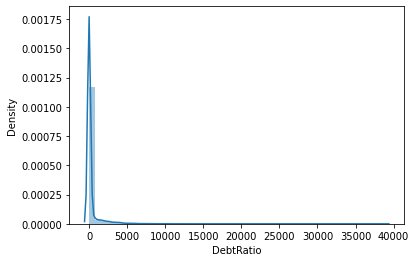

In [29]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["DebtRatio"])


### Feature 7: MonthlyIncome

**Hypothesis:** The higher this value, the less likely the person is to default. BUT, the `DebtRatio` we discussed in the previous section used this to derive it. There is still value in this feature however because it provides an absolute number e.g. if you earn $100 but borrowed $300, you can cobble the rest quite easily whereas if you earn $10k but borrowed $30k, its much harder to repay back if you lose your job suddenly.

**Insights:** Again a right skew, which is not out of the ordinary as incomes can increase exponentially for the rich, but most earn thousands. Hard to differentiate the delinquents just based on this feature alone.

**Possible Actions:** Bin into high income and low income?

**Actionable:** Will scale these continuous values later on

In [30]:
data_dict.get("MonthlyIncome")

['Monthly income', 'real']

In [31]:
df_train["MonthlyIncome"].describe()


count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

/Users/junyean/miniconda3/envs/fp/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

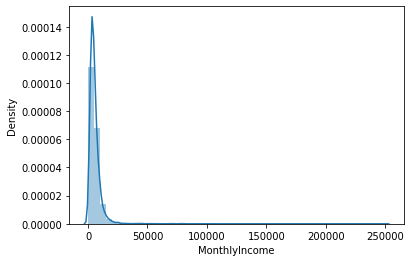

In [32]:
sns.distplot(df_train.loc[df_train["SeriousDlqin2yrs"] == 1]["MonthlyIncome"])


### Feature 8: NumberOfOpenCreditLinesAndLoans

**Hypothesis:** For these values, the higher they are, the more leveraged the person is, which means he is more at risk of delinquency. Here the value is based on quantity rather than value of credits out (which was covered in `DebtRatio`).

**Insights:** Again a right skew, but a normal looking distribution. This complements `DebtRatio` and we cannot just consider this alone e.g. if he has 3 loans but they're big vs 3 loans but they're small, we cannot really differentiate both borrowers.

**Possible Actions:** Clip the outliers so when we scale the values it doesn't compress the rest of them.

**Actionable:** Will scale these values later on

In [33]:
data_dict.get("NumberOfOpenCreditLinesAndLoans")

['Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards)',
 'integer']

In [34]:
df_train["NumberOfOpenCreditLinesAndLoans"].describe()


count    150000.000000
mean          8.452760
std           5.145951
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          58.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

In [35]:
df_train["NumberOfOpenCreditLinesAndLoans"].value_counts().sort_index()


0      1888
1      4438
2      6666
3      9058
4     11609
5     12931
6     13614
7     13245
8     12562
9     11355
10     9624
11     8321
12     7005
13     5667
14     4546
15     3645
16     3000
17     2370
18     1874
19     1433
20     1169
21      864
22      685
23      533
24      422
25      337
26      239
27      194
28      150
29      114
30       88
31       74
32       52
33       47
34       35
35       27
36       18
37        7
38       13
39        9
40       10
41        4
42        8
43        8
44        2
45        8
46        3
47        2
48        6
49        4
50        2
51        2
52        3
53        1
54        4
56        2
57        2
58        1
Name: NumberOfOpenCreditLinesAndLoans, dtype: int64

### Feature 9: NumberRealEstateLoansOrLines

**Hypothesis:** This is a finer-grained feature (subset) of `NumberOfOpenCreditLinesAndLoans`. Again, the higher the value, the more at risk the individual due to his higher leverage. This feature though is more temporal in nature compared to car loans for instance: e.g. in a year of housing busts, people might not be able to sell their homes to pay up their loans whereas in a good year, this might matter less. This is a feature that is likely to have data drift (distribution changes).

**Insights:** Again a right skew (power law). Most take 1 or 2 loans (because you don't need that many homes). However, there are again some outliers that buy lots of homes (property gamblers?)

**Possible Actions:** Clip the outliers, and then scale the values.

**Actionable:** Will scale these values later on

In [36]:
data_dict.get("NumberRealEstateLoansOrLines")

['Number of mortgage and real estate loans including home equity lines of credit',
 'integer']

In [37]:
df_train["NumberRealEstateLoansOrLines"].describe()


count    150000.000000
mean          1.018240
std           1.129771
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          54.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

In [38]:
df_train["NumberRealEstateLoansOrLines"].value_counts().sort_index()


0     56188
1     52338
2     31522
3      6300
4      2170
5       689
6       320
7       171
8        93
9        78
10       37
11       23
12       18
13       15
14        7
15        7
16        4
17        4
18        2
19        2
20        2
21        1
23        2
25        3
26        1
29        1
32        1
54        1
Name: NumberRealEstateLoansOrLines, dtype: int64

### Feature 10: NumberOfDependents

**Hypothesis:** The more people they are associated with, the more liabilities that can pop up in their lives (assuming dependents don't make money), and the more at risk they are. 

**Insights:** Again a right skew (power law). 

**Possible Actions:** This is a value that can be binned (no dependents, some dependents, many dependents)

**Actionable:** Will scale these values later on

In [39]:
data_dict.get("NumberOfDependents")

['Number of dependents in family excluding themselves (spouse, children etc.)',
 'integer']

In [40]:
df_train["NumberOfDependents"].describe()


count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

In [41]:
df_train["NumberOfDependents"].value_counts()


0.0     86902
1.0     26316
2.0     19522
3.0      9483
4.0      2862
5.0       746
6.0       158
7.0        51
8.0        24
9.0         5
10.0        5
13.0        1
20.0        1
Name: NumberOfDependents, dtype: int64


# Preprocessing Steps

<div class="alert alert-block alert-warning">

From our data exploration, we learned some insights - let's act on them here!

The following actionables will form the hyper-parameters for our data pipeline that we can switch on or off.

1) **Imbalanced Classes: <10% of the data is a delinquent**
- **Actionables:** 
    - Consider class balancing techniques in the data pipeline such as up/down sampling such as SMOTE, 
    - weighting the loss function by class balance etc, 
    - models that do better on imbalanced classes e.g. boosting trees that correct errors from before, and 
    - the right metrics that doesn't advantage the larger class e.g. Accuracy will be a misleading metric here.

2) **Normalising data: Most features are not normalised, which weights them higher in magnitude compared to others.**

- **Actionables:** 
    - Consider normalising the data differently based on their distributions
    - But the "good practice" as to whether to normalize the data or not depends on the data, model, and application. By normalizing, we are actually throwing away some information about the data such as the absolute maximum and minimum values. Therefore, this is an optional hyperparameter for our model

3) **Misc cleaning steps: Dealing with NaNs, outliers**
    


<div class="alert alert-block alert-danger">

    
**<span style="color:red">TODO:</span>**
- [ ] Multi-variate relationships might give further insights as well
- [ ] Dig deeper into data to deal with potentially dubious data e.g. weird pattern in `N Days Past Due`
- [ ] Feature engineering: 
    - combine (`NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, `NumberOfTimes90DaysLate`) as a new feature (N Days Past Due), 
    - combine (`NumberOfOpenCreditLinesAndLoans` w/ `NumberRealEstateLoansOrLines` ) as a new feature (TotalLoansAndLines)

# Preprocessing

In this part, we create the possible pre-processed dataframes to feed into the downstream tasks and experiment which work the best for any given model.

In [42]:
# For simplicity, use a standard scaler first - should adapt scaler to different distributions
X_train = df_train.drop(['SeriousDlqin2yrs'], axis=1).copy()
X_test = df_test.drop(['SeriousDlqin2yrs'], axis=1).copy()
scaler = StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

df_train_scaled = pd.concat([pd.DataFrame(X_train_scaled, columns=X_train.columns), df_train['SeriousDlqin2yrs']], axis=1)
df_test_scaled = pd.concat([pd.DataFrame(X_test_scaled, columns=X_train.columns), df_test['SeriousDlqin2yrs']], axis=1)



# Modelling

In this section, I adapted the tester class from [this notebook](https://www.kaggle.com/simonpfish/comp-stats-group-data-project-final) so I can experiment very quickly.

**Questions to Answer (2):** Tell us how you validate your model, which, and why you chose such evaluation technique(s).

**Ans**: The technique to validate my model will be to

- experiment with a few different families of models: 
    - Why? To make sure I choose the best class of algorithms to solve this
- conduct a 5-fold split: 
    - Why? To ensure it is not a one-off data split stroke of luck in good model performance by averaging performance
- find the model with the best AUC: 
    - Why? Use the AUC metric to validate the best class of algorithm
- hyper-parameter tuning: 
    - Why? Optimise this model

--- 

**Questions to Answer (3):** What is AUC?

**Ans:** 
AUC is the area under the ROC curve, with axes TPR=Recall, FPR=1-Precision, at different thresholds. Therefore the higher the AUC, the better the model is generally. 

However, if you have a lot of negative examples as in this dataset, it does not get punished. This will be illustrated in the summary of Question 5.

--- 

**Questions to Answer (4):** Why do you think AUC was used as the evaluation metric for such a problem?

**Ans:** 
As a competitive metric, it removes the need for thresholds in deciding who has the best model - which is actually an extra hyperparameter that may be over-optimised depending on the dataset. A high AUC also looks good for the competition hosts and participants (compared to ranking problems where metrics such as precision@k are normally <0.3) that may look more daunting. Not too sure about other reasons.


Relevant links:
- http://www.chioka.in/differences-between-roc-auc-and-pr-auc/
- https://www.kaggle.com/c/ieee-fraud-detection/discussion/99982

--- 

**Questions to Answer (5):** What are other metrics that you think would also be suitable for this competition?

**Ans:**

There are a range of other classification metrics we can choose from - below are the common ones that are useful for this problem. 

- Accuracy = TP+TN/TP+FP+FN+TN. 
    - Bad for this case because classes are imbalanced (there's so many TN we can just predict it and we'll get it >80% right); i.e if we predict that everyone is not a delinquent, our model will still get 80+% correct (on the train dataset). 
    - Therefore, our bank will lend extremely conservatively - so we might not make money + deny credit to people that may be good.
- Precision = TP/TP+FP. 
    - Good if you are an ethical person (you want a small denominator - meaning for those you predicted as positives should ideally be positives) because the costs of FPs are high here - you don't want to deny credit to someone accidentally, that's unethical. 
    - However, some defaults might happen inevitably.
- Recall = TP/TP+FN. 
    - Good if you want to minimise risk for the bank (you want a small denominator - meaning for those you predicted as positives should ideally be positives) because the costs of FNs are high here - you rather veer on the side of caution in lending to dubious people. 
    - However, you might deny credit to people that may be good.
- F1 = 2*(Recall * Precision) / (Recall + Precision). 
    - The key contrast is instead of using 1-Precision like in AUC as a variable, we use Precision. 
    - Therefore, if your precision is low, the F1 is low, and if your recall is low, your F1 score is low.

Based on this analysis, the F1 score is actually most practical for our needs - maintaining a balance between fairness and business needs. Let's walk through an example.

---

**Example:**
Let's say we want to flag relevant Delinquents out of a list of 1 million customers. Let’s say we’ve got two algorithms we want to compare with the following performance:
- Method 1: 100 predicted Delinquent, 90 actual Delinquent. 
    - Thus, TP = 90, TN = 999890, FP = 10, FN = 10.
- Method 2: 2000 predicted Delinquent, 90 actual Delinquent. 
    - Thus, TP = 90, TN = 997990, FP = 1910, FN = 10.

Clearly, Method 1’s result is preferable since they both come back with the same number of relevant results, but Method 2 brings a ton of false positives with it. The ROC measures of TPR and FPR will reflect that, but since the number of irrelevant results dwarfs the number of relevant ones, the difference is mostly lost when we calculate AUC - in this example the difference between both algorithms is only 0.0019!

- Method 1: 0.9 TPR, 0.00001 FPR
    - TPR = TP/(TP + FN) = 90/(90 + 10) = 0.9
    - FPR = FP/(FP + TN) = 10/(10 + 999890) = 0.00001
- Method 2: 0.9 TPR, 0.00191 FPR **(difference of 0.0019 in AUC scores)**
    - TPR = TP/(TP + FN) = 90/(90 + 10) = 0.9
    - FPR = FP/(FP + TN) = 1910/(1910 + 997990) = 0.0019

When using F1 score however, such differences are punished, and we want that because we don't want too many false positives! That means people are being denied credit! In this example the difference between both algorithms is ~0.85, much larger than when we compared AUC scores which fits our business case!

- Method 1: 0.9 precision, 0.9 recall. **F1 = 0.9**
    - Precision = TP/(TP + FP) = 90/(90 + 10) = 0.9
    - Recall = TP/(TP + FN) = 90/(90 + 10) = 0.9
- Method 2: 0.045 precision (difference of 0.855), 0.9 recall. **F1 = 0.0857 (difference of ~0.85)**
    - Precision = TP/(TP + FP) = 90/(90 + 1910) = 0.045
    - Recall = TP/(TP + FN) = 90/(90 + 10) = 0.9

Of course the assumption is that this is just a point in the TPR/FPR curve, but if this pattern holds (which it will because of the high FN), then clearly F1 score is a better metric for this competition.

--- 

## Picking the best Model (1): Best Type of Model

This will be the general pipeline we use, varying
- Data Processing
- Model

validated over k-folds to find the best combination of both. We shall run with 3 models and 3 datasets for 9 permutations to make it faster, but this pipeline is highly extensible for changes in these components in the future

In [43]:
# A utility class to test all of our models on different datasets on a subset of the data (100k)
class Tester():
    def __init__(self, target):
        self.target = target
        self.datasets = {}
        self.models = {}
        self.cache = {} # we added a simple cache to speed things up

    def addDataset(self, name, df):
        self.datasets[name] = df.copy()

    def addModel(self, name, model):
        self.models[name] = model
        
    def clearModels(self):
        self.models = {}
        
    def clearDatasets(self):
        self.datasets = {}

    def clearCache(self):
        self.cache = {}
    
    def testModelWithDataset(self, m_name, df_name, sample_len, cv):
        if (m_name, df_name, sample_len, cv) in self.cache:
            return self.cache[(m_name, df_name, sample_len, cv)]

        clf = self.models[m_name]

        if not sample_len: 
            sample = self.datasets[df_name]
        else: sample = self.datasets[df_name].sample(sample_len)

        X = sample.drop([self.target], axis=1)
        Y = sample[self.target]

        s = cross_validate(clf, X, Y, scoring=['roc_auc'], cv=cv, n_jobs=-1)
        self.cache[(m_name, df_name, sample_len, cv)] = s

        return s

    def runTests(self, sample_len=120000, cv=5):
        # Tests the added models on all the added datasets
        scores = {}
        for m_name in self.models:
            for df_name in self.datasets:
                # print('Testing %s' % str((m_name, df_name)), end='')
                start = time.time()

                score = self.testModelWithDataset(m_name, df_name, sample_len, cv)
                scores[(m_name, df_name)] = score
                
                end = time.time()
                
                # print(' -- %0.2fs ' % (end - start))

        print('--- Top 10 Results ---')
        for score in sorted(scores.items(), key=lambda x: -1 * x[1]['test_roc_auc'].mean())[:10]:
            auc = score[1]['test_roc_auc']
            print("%s --> AUC: %0.4f (+/- %0.4f)" % (str(score[0]), auc.mean(), auc.std()))

In [44]:
# We will use a tester object across all models
tester = Tester('SeriousDlqin2yrs')

# You can add datasets like this:
tester.addDataset('Drop Missing', df_train.dropna())
tester.addDataset('Scaled + Drop Missing', df_train_scaled.dropna())
tester.addDataset('Median Fill', df_train.fillna(df_train.median()))

# And models like this:
rfc = RandomForestClassifier(n_estimators=50, max_depth = 6, random_state=0)
gbc = GradientBoostingClassifier(n_estimators=50, max_depth = 6, random_state=0)
adb = AdaBoostClassifier(n_estimators=50, random_state=0)
tester.addModel('Simple Random Forest', rfc)
tester.addModel('Simple GBC', gbc)
tester.addModel('Simple Adaboost', gbc)

# You can then use it to run the tests
tester.runTests()

--- Top 10 Results ---
('Simple GBC', 'Median Fill') --> AUC: 0.8642 (+/- 0.0058)
('Simple Adaboost', 'Median Fill') --> AUC: 0.8641 (+/- 0.0030)
('Simple Random Forest', 'Median Fill') --> AUC: 0.8581 (+/- 0.0051)
('Simple GBC', 'Drop Missing') --> AUC: 0.8548 (+/- 0.0057)
('Simple Adaboost', 'Scaled + Drop Missing') --> AUC: 0.8542 (+/- 0.0059)
('Simple Adaboost', 'Drop Missing') --> AUC: 0.8541 (+/- 0.0052)
('Simple GBC', 'Scaled + Drop Missing') --> AUC: 0.8540 (+/- 0.0050)
('Simple Random Forest', 'Scaled + Drop Missing') --> AUC: 0.8511 (+/- 0.0024)
('Simple Random Forest', 'Drop Missing') --> AUC: 0.8501 (+/- 0.0027)


### Conclusion from Model Selection (1)

- Scaling doesn't make an effect on tree-based models which is a known property
- We need to process our test set and train set given the best hyper-parameters here
- We only tried with tree-based models because it seems to work the best compared to other classes of models based on other notebooks
- Boosting Trees do the best, probably because subsequent trees learn to correct the errors from previous trees like GBC and AdaBoost and unlike RF (which grow independently) --> let's experiment further with boosted trees and the median fill strategy!

## Picking the best Model (2): Best Model w/ hyper-parameters

- Based on the previous section, we identified AdaBoost/GradBoost and Median Fill as the best combination thus far - let's tweak our model hyper-parameters (just n_estimators, we can include others like learning rate or max_depth in the future) to find the best model!

In [45]:
tester_2 = Tester('SeriousDlqin2yrs')
tester_2.addDataset('Median Fill', df_train.fillna(df_train.median()))

for j in range(50,100,10):
    adb = AdaBoostClassifier(n_estimators=j, random_state=0)
    gbc = GradientBoostingClassifier(n_estimators=j, max_depth = 6, random_state=0)
    tester_2.addModel('AdaBoost '+' est: '+str(j), adb)
    tester_2.addModel('GradBoost '+' est: '+str(j), adb)

In [46]:
tester_2.runTests()

--- Top 10 Results ---
('GradBoost  est: 80', 'Median Fill') --> AUC: 0.8605 (+/- 0.0047)
('AdaBoost  est: 70', 'Median Fill') --> AUC: 0.8605 (+/- 0.0045)
('GradBoost  est: 70', 'Median Fill') --> AUC: 0.8595 (+/- 0.0053)
('AdaBoost  est: 50', 'Median Fill') --> AUC: 0.8594 (+/- 0.0022)
('AdaBoost  est: 80', 'Median Fill') --> AUC: 0.8594 (+/- 0.0018)
('AdaBoost  est: 60', 'Median Fill') --> AUC: 0.8592 (+/- 0.0045)
('GradBoost  est: 60', 'Median Fill') --> AUC: 0.8588 (+/- 0.0053)
('GradBoost  est: 90', 'Median Fill') --> AUC: 0.8587 (+/- 0.0006)
('GradBoost  est: 50', 'Median Fill') --> AUC: 0.8585 (+/- 0.0006)
('AdaBoost  est: 90', 'Median Fill') --> AUC: 0.8583 (+/- 0.0044)


### Conclusion from Model Selection (2)

- GradBoost seems to be a good choice here (after a few rounds). Let's go with this set of hyperparameters!

## Picking the best Model (3): Predicting with the Best Model

In [47]:
best_est_gbc = GradientBoostingClassifier(n_estimators=90, max_depth = 6, random_state=0)

In [48]:
y_train=df_train['SeriousDlqin2yrs'].astype('uint8')
X_train = df_train.fillna(df_train.median()).drop('SeriousDlqin2yrs', axis=1)
test_data = df_test.fillna(df_train.median()).drop('SeriousDlqin2yrs', axis=1)
best_est_gbc.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, n_estimators=90, random_state=0)

In [49]:
submission_score = best_est_gbc.predict_proba(test_data)[:,1]

ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_score})
submission.to_csv("data/credit_score_submision.csv", index=False)

# Summary of Results

**Questions to Answer (6):** What insight(s) do you have from your model?

**Ans:**: 
- Error Analysis of chosen model
    - Confusion Matrix
        - Looks like the model is not predicting the defaults well! Only a 1/4 hit rate on the class 1. Consider class imbalance remedies as mentioned [in the earlier part of the notebook](#Preprocessing-Steps)
        - Also I have to really explore the data and find out for myself the decision boundaries for a Class 1 user.
    - ROC Curve
        - Fitting and predicting on the same train set (should do a train-test split to get a more accurate measure) - more useful to compare across models
    - Feature Importance
        - Surprisingly, the late payments features were the top few features used by the model in predictions.

In [50]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

def plot_confusion_matrix(
    y_true,
    y_preds,
    classes=None,
    normalize=False,
    title="Confusion matrix",
    cmap=plt.cm.Blues,
):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    if classes is None:
        classes = np.unique(y_preds).astype(int)

    cm = confusion_matrix(y_true, y_preds)

    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(
            j,
            i,
            format(cm[i, j], fmt),
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black",
        )

    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.tight_layout()

y_preds = best_est_gbc.predict(X_train)
y_preds_proba = best_est_gbc.predict_proba(X_train)


Confusion matrix, without normalization


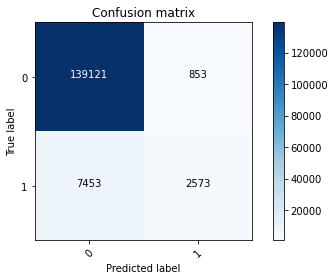

In [51]:
plot_confusion_matrix(y_train, y_preds)

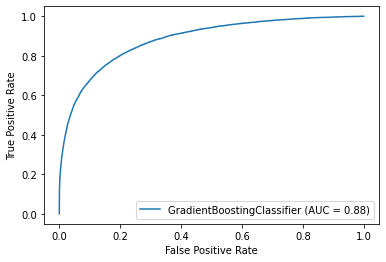

In [53]:
plot_roc_curve(best_est_gbc, X_train, y_train) 
plt.show()   

<AxesSubplot:>

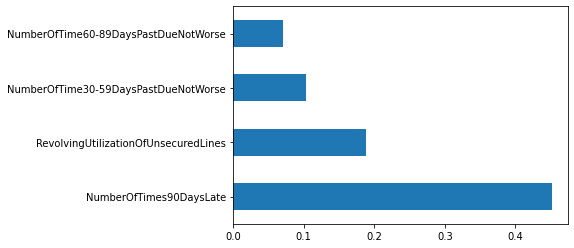

In [54]:
feat_importances = pd.Series(best_est_gbc.feature_importances_, index=X_train.columns)
feat_importances.nlargest(4).plot(kind='barh')

# Iteration 2: Class Weights

We try another round of predictions with some weights added to balance out the 2 classes

In [55]:
sample_weights = np.zeros(len(y_train))
sample_weights[y_train == 0] = 1
sample_weights[y_train == 1] = 13

In [56]:
best_est_gbc.fit(X_train, y_train, sample_weight = sample_weights)

GradientBoostingClassifier(max_depth=6, n_estimators=90, random_state=0)

In [57]:
submission_score = best_est_gbc.predict_proba(test_data)[:,1]

ids = np.arange(1,101504)
submission = pd.DataFrame( {'Id': ids, 'Probability': submission_score})
submission.to_csv("data/credit_score_submision_2.csv", index=False)